# C964 Project - Kaushik Ramesh

# Diabetes Diagnostic Tool

## Import Statements

In [117]:
import pandas as pd
import numpy as np
from sklearn import linear_model, metrics, model_selection
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import ipywidgets as widgets
from IPython.display import display

## Data Cleaning

In [118]:
column_names = ['age', 'gender', 'polyuria', 'polydipsia', 'weight_loss', 'weakness', 'polyphagia', 
                'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing', 'partial_paresis', 
                'muscle_stiffness', 'alopecia', 'obesity', 'has_diabetes']
raw_data_name = ['data']
df_raw_data = pd.read_csv('diabetes_data.csv', names=raw_data_name)
df_raw_data['data_list'] = df_raw_data['data'].str.split(';')
df_raw_data = pd.DataFrame(df_raw_data['data_list'].tolist())
df_raw_data.drop(index=df_raw_data.index[0], axis=0, inplace=True)
df = pd.DataFrame(columns=column_names)
df = pd.concat([df_raw_data], axis=0)
df.columns = column_names

descriptiveFrame = pd.DataFrame(columns=column_names)
descriptiveFrame = pd.concat([df_raw_data], axis=0)
descriptiveFrame.columns = column_names
descriptiveFrame = descriptiveFrame.loc[df["has_diabetes"] =='1']
for i in descriptiveFrame[['polyuria', 'polydipsia', 'weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 
                           'visual_blurring', 'itching', 'irritability', 'delayed_healing', 'partial_paresis', 
                           'muscle_stiffness', 'alopecia', 'obesity', 'has_diabetes']].columns:
   descriptiveFrame[i].replace('1',i + ' present',inplace=True)

for i in descriptiveFrame[['polyuria', 'polydipsia', 'weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 
                           'visual_blurring', 'itching', 'irritability', 'delayed_healing', 'partial_paresis', 
                           'muscle_stiffness', 'alopecia', 'obesity', 'has_diabetes']].columns:
   descriptiveFrame[i].replace('0', i + ' not present', inplace=True)


## Data Visualization

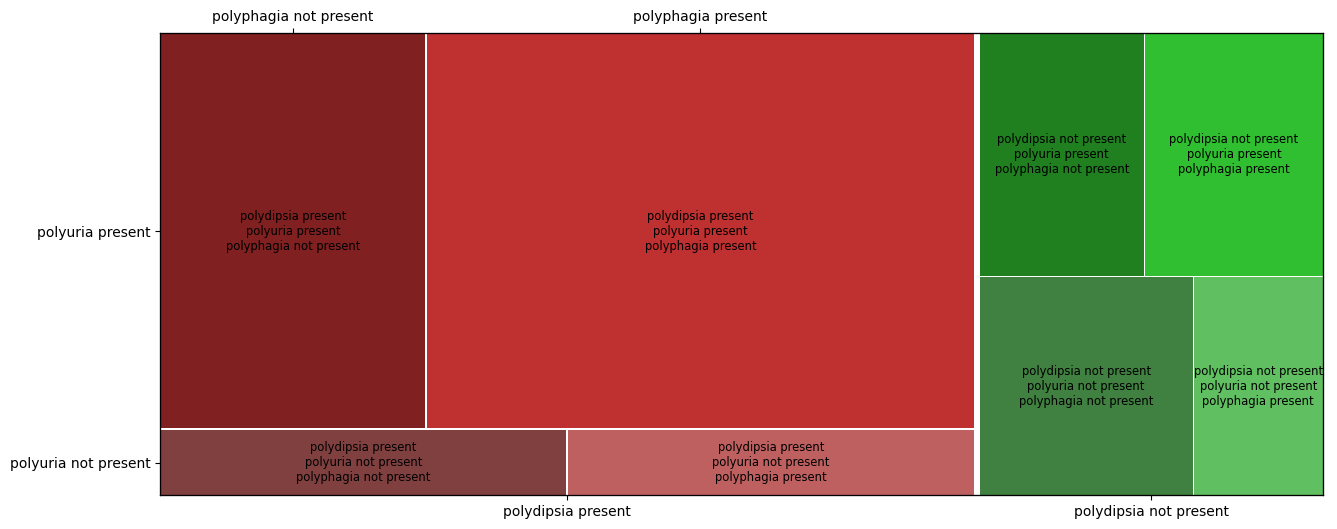

In [119]:
plt.rcParams['figure.figsize'] = [15, 6]
mosaic(descriptiveFrame, ['polydipsia', 'polyuria', 'polyphagia'])
plt.show()

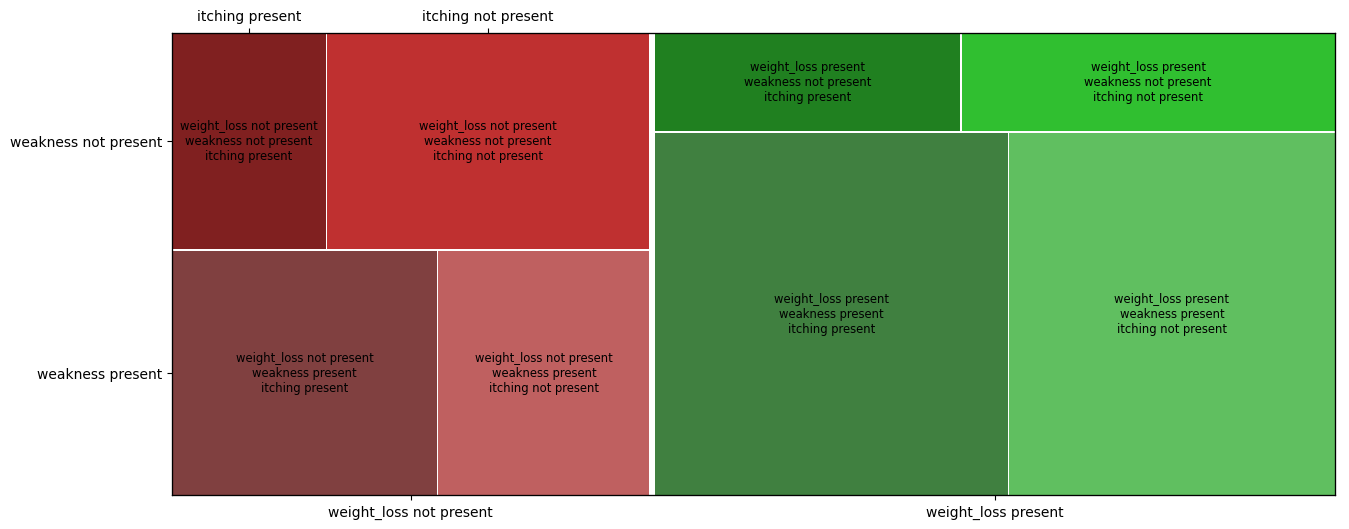

In [120]:
mosaic(descriptiveFrame, ['weight_loss', 'weakness', 'itching'])
plt.show()

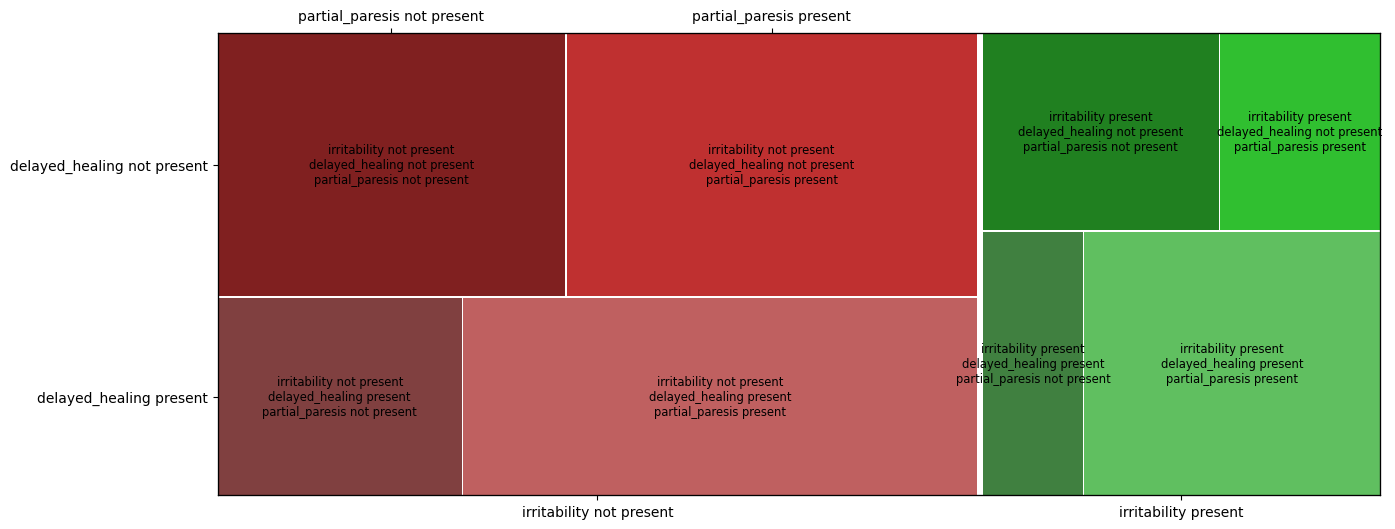

In [121]:
mosaic(descriptiveFrame, ['irritability', 'delayed_healing', 'partial_paresis'])
plt.show()

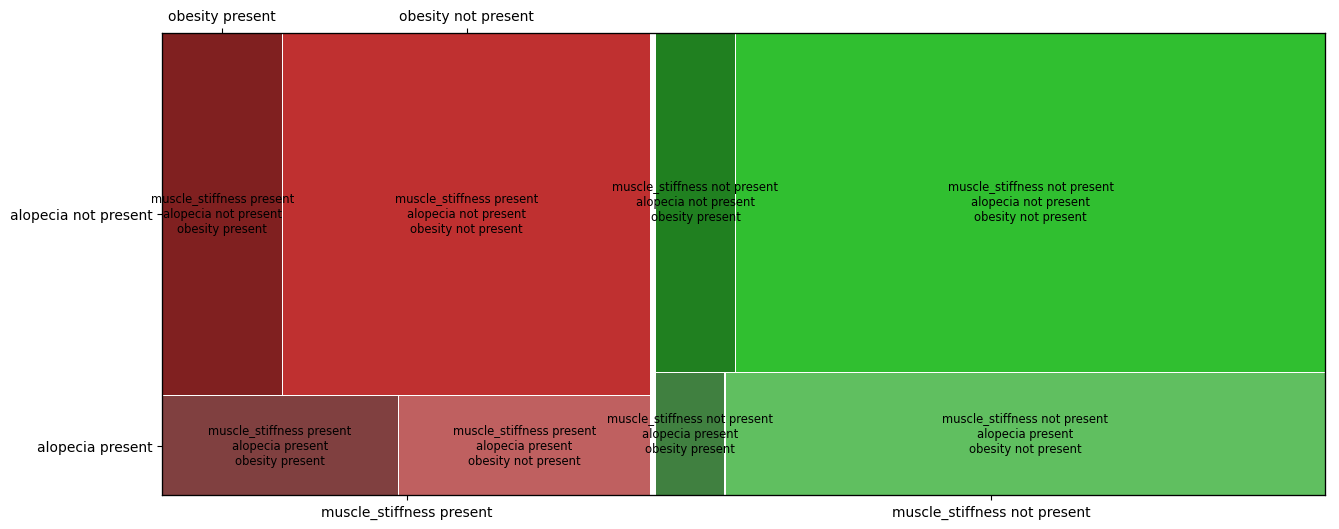

In [122]:
mosaic(descriptiveFrame, ['muscle_stiffness', 'alopecia', 'obesity'])
plt.show()

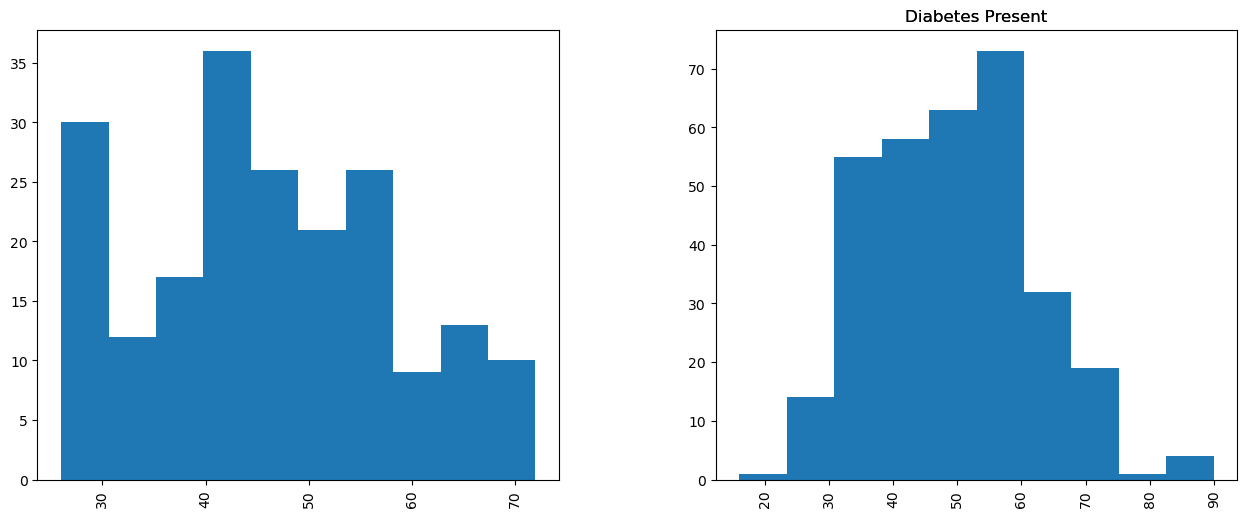

In [123]:
df['gender'] = np.where(
   (df['gender'] == 'Male'), 0, df['gender']
   )

df['gender'] = np.where(
   (df['gender'] == 'Female'), 1, df['gender']
   )

df = df.astype('int')

histDiabetes = df['age'].hist(by=df['has_diabetes'])
plt.title("Diabetes Present")
histDiabetes[0].title = histDiabetes[1].title

## Logistic Regression Training

In [124]:

my_model = linear_model.LogisticRegression(max_iter=600)

y = df.values[:,16]
x = df.values[:,0:16]
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size=0.2)

my_model.fit(x_train,y_train)

LogisticRegression(max_iter=600)

## Outcome Accuracy

In [125]:
y_pred = my_model.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9423076923076923


## Real-Time Queries/ User Input 

In [126]:
gender = widgets.RadioButtons(
    options=['Male', 'Female'],
    description='Gender:',
    disabled=False
)
age = widgets.IntSlider(
    value=50,
    min=30,
    max=70,
    step=1,
    description='Age:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

polyuria = widgets.Checkbox(
    value=False,
    description='Polyuria',
    disabled=False
)

polydipsia = widgets.Checkbox(
    value=False,
    description='Polydipsia',
    disabled=False
)

weight_loss = widgets.Checkbox(
    value=False,
    description='Weight Loss',
    disabled=False
)

weakness = widgets.Checkbox(
    value=False,
    description='Weakness',
    disabled=False
)

polyphagia = widgets.Checkbox(
    value=False,
    description='Polyphagia',
    disabled=False
)

genital_thrush = widgets.Checkbox(
    value=False,
    description='Genital Thrush',
    disabled=False
)

visual_blurring = widgets.Checkbox(
    value=False,
    description='Visual Blurring',
    disabled=False
)

itching = widgets.Checkbox(
    value=False,
    description='Itching',
    disabled=False
)

irritability = widgets.Checkbox(
    value=False,
    description='Irritability',
    disabled=False
)

delayed_healing = widgets.Checkbox(
    value=False,
    description='Delayed Healing',
    disabled=False
)

partial_paresis = widgets.Checkbox(
    value=False,
    description='Partial Paresis',
    disabled=False
)

muscle_stiffness = widgets.Checkbox(
    value=False,
    description='Muscle Stiffness',
    disabled=False
)

alopecia = widgets.Checkbox(
    value=False,
    description='Alopecia',
    disabled=False
)

obesity = widgets.Checkbox(
    value=False,
    description='Obesity',
    disabled=False
)

### Input the patient's age and gender.

In [127]:
display(gender, age)

RadioButtons(description='Gender:', options=('Male', 'Female'), value='Male')

IntSlider(value=50, continuous_update=False, description='Age:', max=70, min=30)

### Check any symptoms the patient is experiencing.

In [128]:
display(polyuria, polydipsia, weight_loss, weakness, polyphagia, genital_thrush, visual_blurring, itching, 
        irritability, delayed_healing, partial_paresis, muscle_stiffness, alopecia, obesity)

Checkbox(value=False, description='Polyuria')

Checkbox(value=False, description='Polydipsia')

Checkbox(value=False, description='Weight Loss')

Checkbox(value=False, description='Weakness')

Checkbox(value=False, description='Polyphagia')

Checkbox(value=False, description='Genital Thrush')

Checkbox(value=False, description='Visual Blurring')

Checkbox(value=False, description='Itching')

Checkbox(value=False, description='Irritability')

Checkbox(value=False, description='Delayed Healing')

Checkbox(value=False, description='Partial Paresis')

Checkbox(value=False, description='Muscle Stiffness')

Checkbox(value=False, description='Alopecia')

Checkbox(value=False, description='Obesity')

## Final Result

#### Click anywhere on the cell below and press the run button

In [129]:
patient_gender = 0
if (gender.value == 'Male'):
    patient_gender = 0
else:
    patient_gender = 1
diabetes_diagnosis = my_model.predict([[age.value, patient_gender, polyuria.value, polydipsia.value, weight_loss.value, weakness.value,
                         polyphagia.value, genital_thrush.value, visual_blurring.value, itching.value, irritability.value,
                         delayed_healing.value, partial_paresis.value, muscle_stiffness.value, alopecia.value, 
                         obesity.value]])

if (diabetes_diagnosis == 1):
    print("This patient is likely to have diabetes. Blood testing recommended.")
else:
    print("This patient does not have diabetes.")


This patient does not have diabetes.
